In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX 

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#load the Data
df = pd.read_csv('../data/oil.csv')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [3]:
#Change data type
df['Date'] = pd.to_datetime(df['Date'])

#Set the index
df.set_index('Date', inplace=True)

#set the frequency
df = df.asfreq('b', method='ffill')

In [4]:
#Split the data for training and test data
shape = int(len(df)*0.8)

#train test split
train = df.iloc[:shape]
test = df.iloc[shape:]

print("Train set size:", len(train))
print("Test set size:", len(test))


Train set size: 7407
Test set size: 1852


In [50]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Price'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29643.917, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29649.239, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29644.045, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29643.691, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29647.661, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29641.189, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29642.381, Time=2.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=29640.710, Time=1.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29639.436, Time=2.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29634.700, Time=5.86 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29635.640, Time=6.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29636.474, Time=7.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29634.730, Time=8.11 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=29633.118, Time=3.51 sec
 ARIMA(1,1,3)(0,0,0

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Price'],  order = (2, 1, 3),trend='c') 
  
result = model.fit() 
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7407
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -10836.496
Date:                Sun, 23 Feb 2025   AIC                          21686.992
Time:                        19:41:06   BIC                          21735.362
Sample:                    05-20-1987   HQIC                         21703.612
                         - 10-08-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0072      0.021      0.349      0.727      -0.033       0.048
ar.L1         -0.3974      0.302     -1.317      0.188      -0.989       0.194
ar.L2         -0.2029      0.288     -0.704      0.4

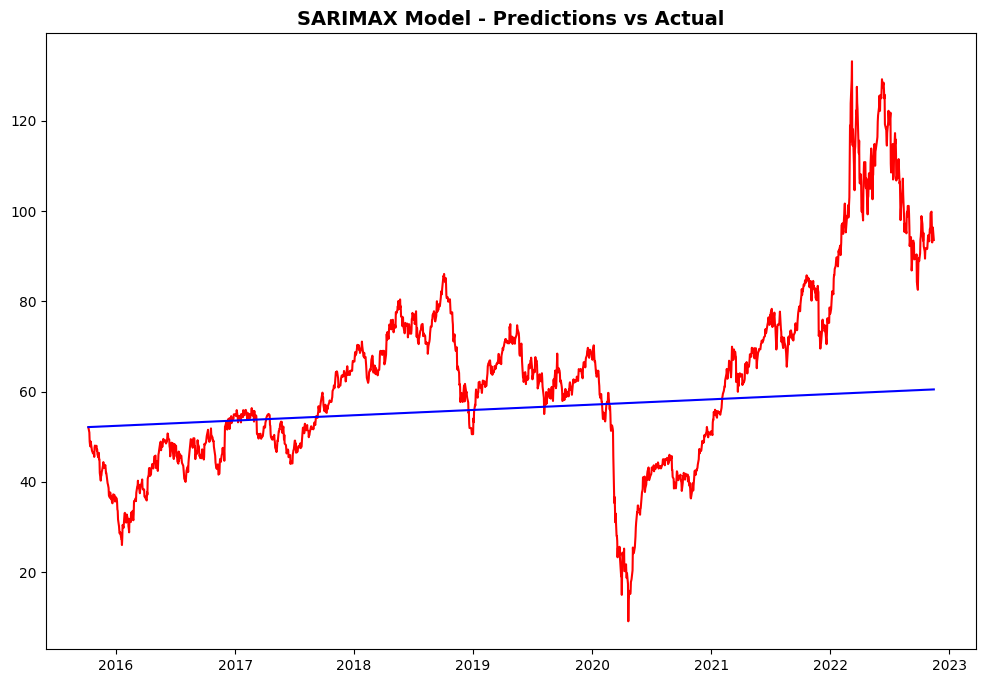

In [72]:
# Gets forecast for evaluation
preds = result.forecast(len(test))

# Plot actual and predicted prices
plt.figure(figsize=(12,8))
plt.plot(test.index, test["Price"], label="Actual Prices", color="red")
plt.plot(test.index, preds, label="Predicted Prices", color="blue")
plt.title("SARIMAX Model - Predictions vs Actual", fontsize=14, fontweight="bold")
plt.show()

In [73]:
# To evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
  
rmse = np.sqrt(mean_squared_error(test.values, preds.values))
mae = mean_absolute_error(test.values, preds.values)
mape = mean_absolute_percentage_error(test.values, preds.values)

print('Root Mean Square Error (RMSE): {} \nMean Absolute Error (MAE): {} \nMean Absolute Percentage Error (MAPE): {}'.
       format(np.round(rmse, 3),np.round(mae, 3), np.round(mape, 3)))

Root Mean Square Error (RMSE): 20.347 
Mean Absolute Error (MAE): 15.064 
Mean Absolute Percentage Error (MAPE): 0.255


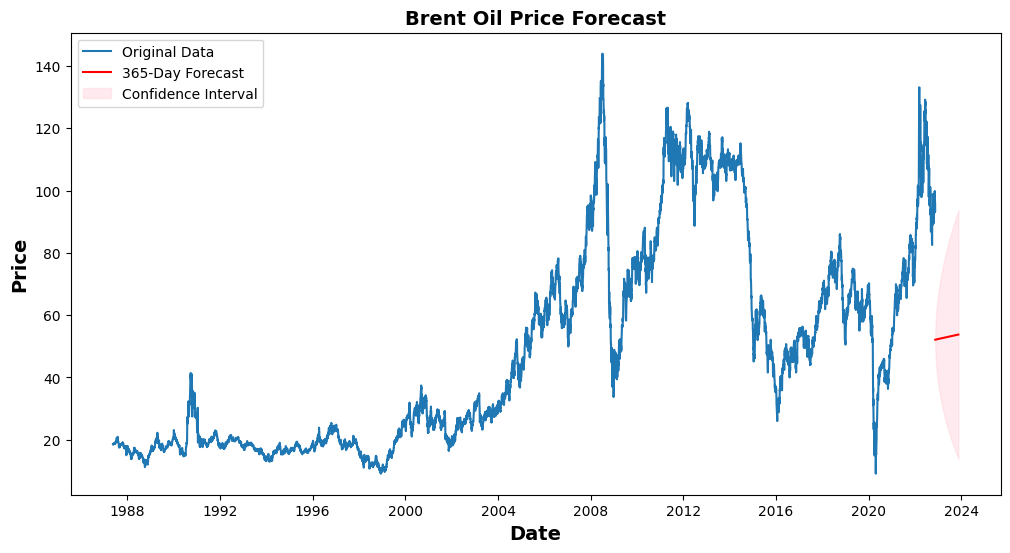

                 Date  Forecasted Price  Lower Bound  Upper Bound
2015-10-09 2022-11-15         52.140546    50.091870    54.189222
2015-10-12 2022-11-16         52.157569    49.208898    55.106241
2015-10-13 2022-11-17         52.147854    48.520029    55.775678
2015-10-14 2022-11-18         52.155472    47.978284    56.332660
2015-10-15 2022-11-19         52.161628    47.491138    56.832118
...               ...               ...          ...          ...
2017-02-24 2023-11-10         53.764946    14.099284    93.430607
2017-02-27 2023-11-11         53.769452    14.048891    93.490013
2017-02-28 2023-11-12         53.773959    13.998574    93.549344
2017-03-01 2023-11-13         53.778465    13.948332    93.608598
2017-03-02 2023-11-14         53.782972    13.898166    93.667778

[365 rows x 4 columns]


In [87]:
# Forecast the next 365 days with confidence intervals
forecast_result = result.get_forecast(steps=365)
future_forecast = forecast_result.predicted_mean  # Forecasted values
future_conf_int = forecast_result.conf_int()  # Confidence intervals

# Create a date range for the forecasted period
future_index = pd.date_range(df.index[-1], periods=366, freq='D')[1:]  # Start from the last date in the data

# Plot the original data, test predictions, and future forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Original Data')
plt.plot(future_index, future_forecast, label='365-Day Forecast', color='red')
plt.fill_between(future_index, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Brent Oil Price Forecast',fontsize=14, fontweight="bold")
plt.xlabel('Date',fontsize=14, fontweight="bold")
plt.ylabel('Price',fontsize=14, fontweight="bold")
plt.legend()
plt.show()

# Print the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_index,
    'Forecasted Price': future_forecast,
    'Lower Bound': future_conf_int.iloc[:, 0],
    'Upper Bound': future_conf_int.iloc[:, 1]
})
print(forecast_df)

### ***GARCH Model***

            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


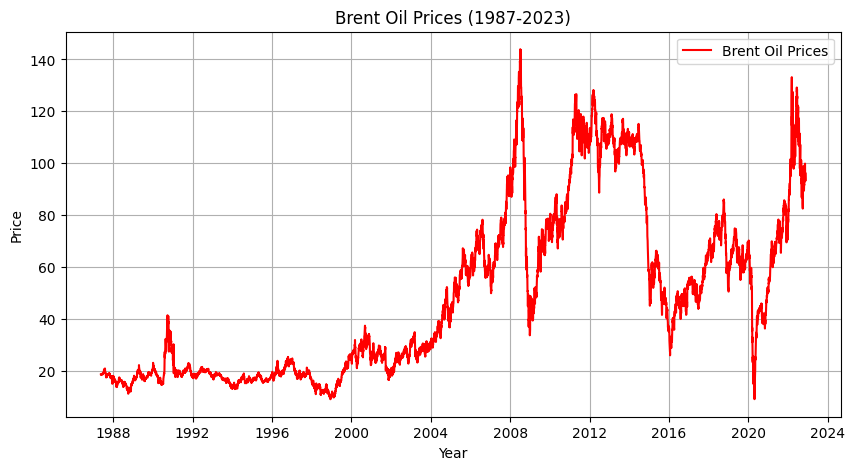

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure data is sorted by date
df = df.sort_index()

# Check data
print(df.head())

# Plot the historical price
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Price"], label="Brent Oil Prices", color="red")
plt.title("Brent Oil Prices (1987-2023)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


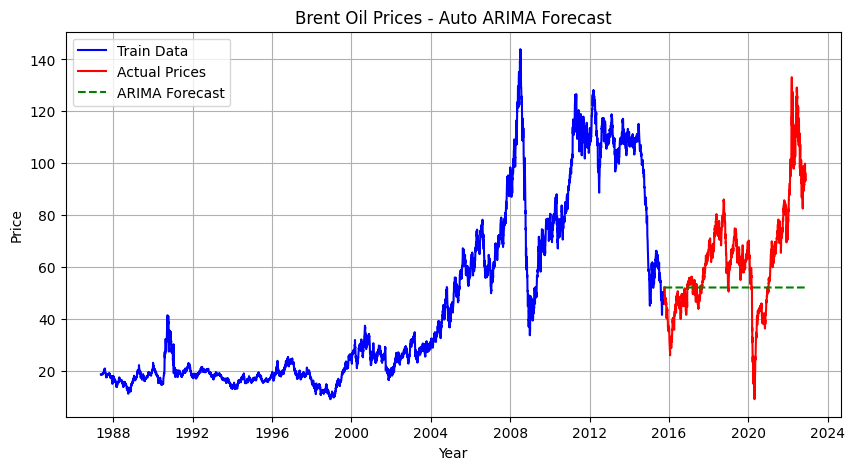

In [89]:
# Train Auto ARIMA on training data
auto_arima_model = auto_arima(train["Price"], 
                              start_p=1, start_q=1, 
                              max_p=5, max_q=5, 
                              seasonal=False, 
                              d=None, 
                              error_action="ignore", 
                              suppress_warnings=True, 
                              stepwise=True)

# Forecast for test period
n_periods = len(test)
arima_forecast = auto_arima_model.predict(n_periods=n_periods)

# Convert forecast to DataFrame
arima_forecast_df = pd.DataFrame({"ARIMA_Forecast": arima_forecast}, index=test.index)

# Plot Actual vs Forecasted Prices
plt.figure(figsize=(10, 5))
plt.plot(train.index, train["Price"], label="Train Data", color="blue")
plt.plot(test.index, test["Price"], label="Actual Prices", color="red")
plt.plot(arima_forecast_df.index, arima_forecast_df["ARIMA_Forecast"], label="ARIMA Forecast", color="green", linestyle="dashed")
plt.title("Brent Oil Prices - Auto ARIMA Forecast")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

d:\Personal Files\KIAM Notebooks\KIAM-Week10\.venv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004987. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


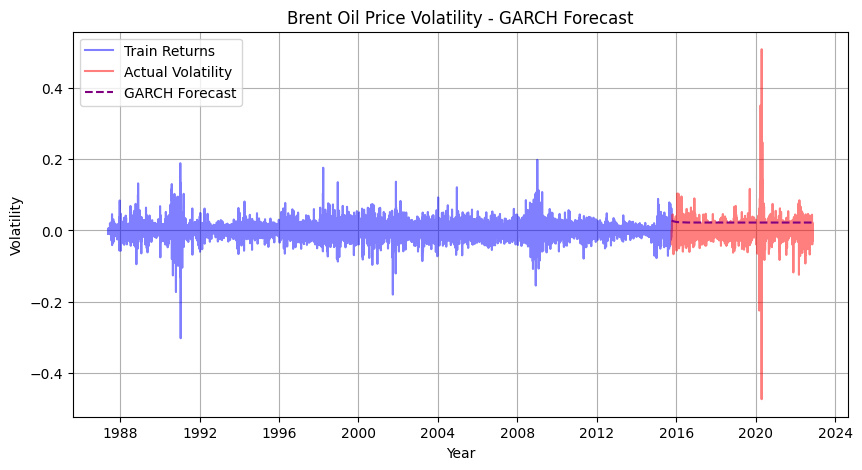

In [92]:
# Convert Prices to Returns (Log Returns for Stationarity)
df["Returns"] = df["Price"].pct_change().dropna()

# Split Train & Test Returns
train_returns = df["Returns"].iloc[:shape].dropna()
test_returns = df["Returns"].iloc[shape:].dropna()

# Fit GARCH(1,1) Model
garch_model = arch_model(train_returns, vol="Garch", p=1, q=1)
garch_fit = garch_model.fit(disp="off")

# Forecast Volatility
garch_forecast = garch_fit.forecast(horizon=len(test_returns))

# Extract Conditional Volatility
vol_forecast = np.sqrt(garch_forecast.variance.iloc[-1].values)

# Convert to DataFrame
garch_forecast_df = pd.DataFrame({"GARCH_Volatility": vol_forecast}, index=test_returns.index)

# Plot Actual vs Forecasted Volatility
plt.figure(figsize=(10, 5))
plt.plot(train_returns.index, train_returns, label="Train Returns", color="blue", alpha=0.5)
plt.plot(test_returns.index, test_returns, label="Actual Volatility", color="red", alpha=0.5)
plt.plot(garch_forecast_df.index, garch_forecast_df["GARCH_Volatility"], label="GARCH Forecast", color="purple", linestyle="dashed")
plt.title("Brent Oil Price Volatility - GARCH Forecast")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Evaluate Auto ARIMA (Price Forecast)
arima_rmse = np.sqrt(mean_squared_error(test["Price"], arima_forecast))
arima_mae = mean_absolute_error(test["Price"], arima_forecast)

print(f"📊 Auto ARIMA Evaluation:")
print(f"RMSE: {arima_rmse:.2f}")
print(f"MAE: {arima_mae:.2f}")

# Evaluate GARCH (Volatility Forecast)
garch_rmse = np.sqrt(mean_squared_error(test_returns, vol_forecast))
garch_mae = mean_absolute_error(test_returns, vol_forecast)

print(f"\n📊 GARCH Evaluation:")
print(f"RMSE: {garch_rmse:.6f}")
print(f"MAE: {garch_mae:.6f}")


📊 Auto ARIMA Evaluation:
RMSE: 23.25
MAE: 17.25

📊 GARCH Evaluation:
RMSE: 0.039713
MAE: 0.027796
